In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [55]:
# Exercise 1
# 1.1 Load the dataset
df = pd.read_csv('../data/housing-data.csv')

In [56]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a39849f98>,
      dtype=object)

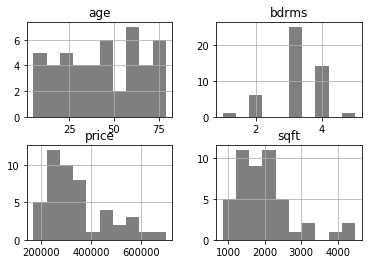

In [57]:
# 1.2 Plot Histogram for each feature
df.hist(color='k', alpha=0.5, bins=10)

In [58]:
#1.3 Create variables X, y
X = df[['sqft', 'bdrms', 'age']].values
y = df['price'].values

In [59]:
# 1.4 Create linear regression model in Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [60]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [61]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 1.5 Split data in train / test set with a 20% test size
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [64]:
len(X_train)

37

In [65]:
len(X_test)

10

In [66]:
# 1.6 train the model on the train set and test set and see it's accuracy
model.fit(X_train, y_train, epochs=200, verbose=0)

In [67]:
W, B = model.get_weights()

In [68]:
W

array([[162.07951],
       [164.06854],
       [156.61942]], dtype=float32)

In [69]:
B

array([166.65355], dtype=float32)

In [70]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [71]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [72]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	4779877574.7
The Mean Squared Error on the Test set is:	4431708212.5


In [73]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.613
The R2 score on the Test set is:	0.807


In [74]:
# Feature normalisation
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5
df.describe().round(2)

,sqft,bdrms,age,price,sqft1000,age10,price100k
count,47.00,47.00,47.00,47.00,47.00,47.00,47.00
mean,2000.68,3.17,42.74,340412.66,2.00,4.27,3.40
std,794.70,0.76,22.87,125039.90,0.79,2.29,1.25
min,852.00,1.00,5.00,169900.00,0.85,0.50,1.70
25%,1432.00,3.00,24.50,249900.00,1.43,2.45,2.50
50%,1888.00,3.00,44.00,299900.00,1.89,4.40,3.00
75%,2269.00,4.00,61.50,384450.00,2.27,6.15,3.84
max,4478.00,5.00,79.00,699900.00,4.48,7.90,7.00


In [75]:
#1.3 Create variables X, y
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [77]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(lr=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=200, verbose=0)

In [78]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [79]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	0.5
The Mean Squared Error on the Test set is:	0.6


In [80]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.688
The R2 score on the Test set is:	0.541
